In [1]:
from __future__ import division, print_function

import numpy as np
import lda
import lda.datasets

In [2]:
X = lda.datasets.load_reuters()
print("type(X): {}".format(type(X)))
print("shape: {}\n".format(X.shape))

type(X): <class 'numpy.ndarray'>
shape: (395, 4258)



In [3]:
vocab = lda.datasets.load_reuters_vocab()
print("type(vocab): {}".format(type(vocab)))
print("len(vocab): {}\n".format(len(vocab)))

type(vocab): <class 'tuple'>
len(vocab): 4258



In [4]:
titles = lda.datasets.load_reuters_titles()
print("type(titles): {}".format(type(titles)))
print("len(titles): {}\n".format(len(titles)))


type(titles): <class 'tuple'>
len(titles): 395



In [5]:
doc_id = 0
word_id = 3117

print("doc id: {} word id: {}".format(doc_id, word_id))
print("-- count: {}".format(X[doc_id, word_id]))
print("-- word : {}".format(vocab[word_id]))
print("-- doc  : {}".format(titles[doc_id]))

doc id: 0 word id: 3117
-- count: 2
-- word : heir-to-the-throne
-- doc  : 0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20


In [6]:
model = lda.LDA(n_topics=20, n_iter=500, random_state=1)
model.fit(X)

In [7]:
topic_word = model.topic_word_
print("type(topic_word): {}".format(type(topic_word)))
print("shape: {}".format(topic_word.shape))

type(topic_word): <class 'numpy.ndarray'>
shape: (20, 4258)


In [8]:
for n in range(5):
    sum_pr = sum(topic_word[n,:])
    print("topic: {} sum: {}".format(n, sum_pr))

topic: 0 sum: 1.0000000000000875
topic: 1 sum: 1.0000000000001148
topic: 2 sum: 0.9999999999998656
topic: 3 sum: 1.0000000000000042
topic: 4 sum: 1.0000000000000928


In [9]:
n = 5
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n+1):-1]
    print('*Topic {}\n- {}'.format(i, ' '.join(topic_words)))    


*Topic 0
- government british minister west group
*Topic 1
- church first during people political
*Topic 2
- elvis king wright fans presley
*Topic 3
- yeltsin russian russia president kremlin
*Topic 4
- pope vatican paul surgery pontiff
*Topic 5
- family police miami versace cunanan
*Topic 6
- south simpson born york white
*Topic 7
- order church mother successor since
*Topic 8
- charles prince diana royal queen
*Topic 9
- film france french against actor
*Topic 10
- germany german war nazi christian
*Topic 11
- east prize peace timor quebec
*Topic 12
- n't told life people church
*Topic 13
- years world time year last
*Topic 14
- mother teresa heart charity calcutta
*Topic 15
- city salonika exhibition buddhist byzantine
*Topic 16
- music first people tour including
*Topic 17
- church catholic bernardin cardinal bishop
*Topic 18
- harriman clinton u.s churchill paris
*Topic 19
- century art million museum city


In [10]:
doc_topic = model.doc_topic_
print("type(doc_topic): {}".format(type(doc_topic)))
print("shape: {}".format(doc_topic.shape))


type(doc_topic): <class 'numpy.ndarray'>
shape: (395, 20)


In [11]:
for n in range(5):
    sum_pr = sum(doc_topic[n,:])
    print("document: {} sum: {}".format(n, sum_pr))


document: 0 sum: 1.0000000000000002
document: 1 sum: 0.9999999999999998
document: 2 sum: 1.0
document: 3 sum: 1.0000000000000002
document: 4 sum: 0.9999999999999997


In [12]:
for n in range(10):
    topic_most_pr = doc_topic[n].argmax()
    print("doc: {} topic: {}\n{}...".format(n,
                                            topic_most_pr,
                                            titles[n][:50]))


doc: 0 topic: 8
0 UK: Prince Charles spearheads British royal revo...
doc: 1 topic: 1
1 GERMANY: Historic Dresden church rising from WW2...
doc: 2 topic: 14
2 INDIA: Mother Teresa's condition said still unst...
doc: 3 topic: 8
3 UK: Palace warns British weekly over Charles pic...
doc: 4 topic: 14
4 INDIA: Mother Teresa, slightly stronger, blesses...
doc: 5 topic: 14
5 INDIA: Mother Teresa's condition unchanged, thou...
doc: 6 topic: 14
6 INDIA: Mother Teresa shows signs of strength, bl...
doc: 7 topic: 14
7 INDIA: Mother Teresa's condition improves, many ...
doc: 8 topic: 14
8 INDIA: Mother Teresa improves, nuns pray for "mi...
doc: 9 topic: 8
9 UK: Charles under fire over prospect of Queen Ca...


In [13]:
import matplotlib.pyplot as plt

# use matplotlib style sheet
try:
    plt.style.use('ggplot')
except:
    # version of matplotlib might not be recent
    pass    

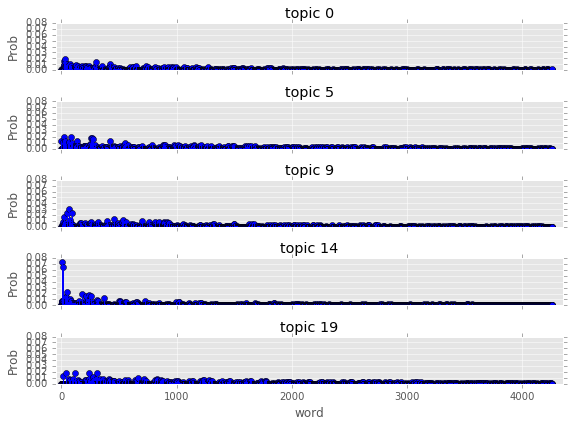

In [14]:
%matplotlib inline
f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
for i, k in enumerate([0, 5, 9, 14, 19]):
    ax[i].stem(topic_word[k,:], linefmt='b-',
               markerfmt='bo', basefmt='w-')
    ax[i].set_xlim(-50,4350)
    ax[i].set_ylim(0, 0.08)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("topic {}".format(k))

ax[4].set_xlabel("word")

plt.tight_layout()
plt.show()

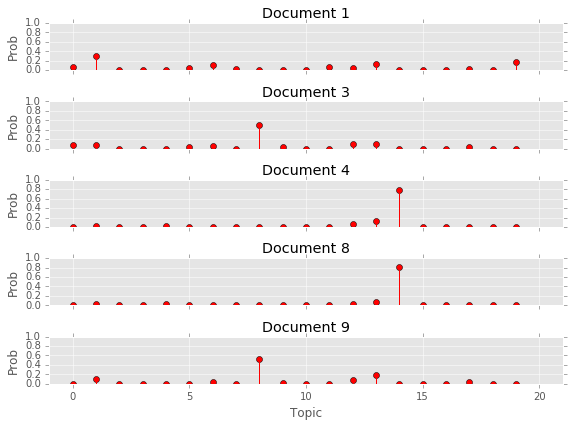

In [16]:
f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
for i, k in enumerate([1, 3, 4, 8, 9]):
    ax[i].stem(doc_topic[k,:], linefmt='r-',
               markerfmt='ro', basefmt='w-')
    ax[i].set_xlim(-1, 21)
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("Document {}".format(k))

ax[4].set_xlabel("Topic")

plt.tight_layout()
plt.show()

# Teine variant

In [1]:
import numpy as np
import logging
import pyLDAvis.gensim
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

C:\Users\Risto\Anaconda3\lib\site-packages\funcy\decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
C:\Users\Risto\Anaconda3\lib\site-packages\funcy\decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
C:\Users\Risto\Anaconda3\lib\site-packages\funcy\decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
C:\Users\Risto\Anaconda3\lib\site-packages\funcy\decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
C:\Users\Risto\Anaconda3\lib\site-packages\funcy\decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
C:\Users\Risto\Anaconda3\lib\site-packages\funcy\decora

In [2]:
texts = [['human', 'interface', 'computer'],
         ['survey', 'user', 'computer', 'system', 'response', 'time'],
         ['eps', 'user', 'interface', 'system'],
         ['system', 'human', 'system', 'eps'],
         ['user', 'response', 'time'],
         ['trees'],
         ['graph', 'trees'],
         ['graph', 'minors', 'trees'],
         ['graph', 'minors', 'survey']]



In [3]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [4]:
goodLdaModel = LdaModel(corpus=corpus, id2word=dictionary, iterations=50, num_topics=2)
badLdaModel = LdaModel(corpus=corpus, id2word=dictionary, iterations=1, num_topics=2)


In [5]:
pyLDAvis.enable_notebook()

In [6]:
pyLDAvis.gensim.prepare(goodLdaModel, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
1      50.967549        1       1  0.020381  0.0
0      49.032451        1       2 -0.020381  0.0, topic_info=     Category      Freq       Term     Total  loglift  logprob
term                                                          
1     Default  2.000000       time  2.000000  12.0000  12.0000
7     Default  2.000000       user  2.000000  11.0000  11.0000
2     Default  2.000000     minors  2.000000  10.0000  10.0000
11    Default  2.000000        eps  2.000000   9.0000   9.0000
4     Default  2.000000   response  2.000000   8.0000   8.0000
8     Default  2.000000   computer  2.000000   7.0000   7.0000
10    Default  3.000000     system  3.000000   6.0000   6.0000
5     Default  2.000000      human  2.000000   5.0000   5.0000
6     Default  2.000000      graph  2.000000   4.0000   4.0000
3     Default  2.000000     survey  2.000000   3.0000   3.0000
0     Default  2.000000      trees  2.000000   2.0000   2.0000
9     Default  2.000000  interface  2.000000   1.0000   1.0000
2      Topic1  1.592395     minors  2.204162   0.3489  -2.2281
11     Topic1  1.495475        eps  2.188566   0.2932  -2.2909
10     Topic1  2.262166     system  3.610552   0.2064  -1.8770
5      Topic1  1.307497      human  2.158317   0.1728  -2.4252
6      Topic1  1.676965      graph  2.867077   0.1377  -2.1763
0      Topic1  1.545766      trees  2.845965   0.0636  -2.2578
9      Topic1  1.061840  interface  2.118786  -0.0169  -2.6333
3      Topic1  0.927368     survey  2.097148  -0.1420  -2.7687
8      Topic1  0.771109   computer  2.072003  -0.3145  -2.9532
4      Topic1  0.721024   response  2.063943  -0.3777  -3.0204
7      Topic1  0.890127       user  2.740461  -0.4505  -2.8097
1      Topic1  0.528856       time  2.033020  -0.6726  -3.3304
1      Topic2  1.504163       time  2.033020   0.4114  -2.2464
7      Topic2  1.850333       user  2.740461   0.3199  -2.0392
4      Topic2  1.342919   response  2.063943   0.2829  -2.3598
8      Topic2  1.300893   computer  2.072003   0.2472  -2.3916
3      Topic2  1.169779     survey  2.097148   0.1289  -2.4978
9      Topic2  1.056947  interface  2.118786   0.0172  -2.5992
0      Topic2  1.300198      trees  2.845965  -0.0707  -2.3921
6      Topic2  1.190112      graph  2.867077  -0.1666  -2.4806
5      Topic2  0.850820      human  2.158317  -0.2182  -2.8162
10     Topic2  1.348386     system  3.610552  -0.2723  -2.3557
11     Topic2  0.693091        eps  2.188566  -0.4372  -3.0212
2      Topic2  0.611767     minors  2.204162  -0.5691  -3.1460, token_table=      Topic      Freq       Term
term                            
8         1  0.482625   computer
8         2  0.482625   computer
11        1  0.456920        eps
11        2  0.456920        eps
6         1  0.697575      graph
6         2  0.348787      graph
5         1  0.463324      human
5         2  0.463324      human
9         1  0.471968  interface
9         2  0.471968  interface
2         1  0.907374     minors
2         2  0.453687     minors
4         1  0.484509   response
4         2  0.484509   response
3         1  0.476838     survey
3         2  0.476838     survey
10        1  0.553932     system
10        2  0.276966     system
1         1  0.491879       time
1         2  0.983758       time
0         1  0.702749      trees
0         2  0.351375      trees
7         1  0.364902       user
7         2  0.729804       user, R=12, lambda_step=0.01, plot_opts={'ylab': 'PC2', 'xlab': 'PC1'}, topic_order=[2, 1])

In [49]:
print(goodLdaModel.print_topics(num_topics=3, num_words=3))

[(0, '0.130*"user" + 0.106*"time" + 0.095*"system"'), (1, '0.153*"system" + 0.113*"graph" + 0.108*"minors"')]


In [11]:
#twitter
import tweepy
from tweepy import OAuthHandler
 
consumer_key = 'C8Jpl39xJIVC6uw4zb6Rj809s'
consumer_secret = 'VjTKEep9JMmrk8mezvSF3C4igtKkIWg2GObwuJ6TCWB8qsL6q4'
access_token = '900293220-O76OTSxQzZeB7hvjlwujXYg7rDzN4Dy7bF4LBZn8'
access_secret = 'LGjLVWtiB8gloVC2nhi04KroTlJLtWiic803qiN296JFc'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [14]:
#for tweet in tweepy.Cursor(api.search, q="Trump", lang="en").items():
 #   print(tweet)

In [15]:
from twython import Twython

In [17]:
APP_KEY = 'C8Jpl39xJIVC6uw4zb6Rj809s'
APP_SECRET = 'VjTKEep9JMmrk8mezvSF3C4igtKkIWg2GObwuJ6TCWB8qsL6q4'

twitter = Twython(APP_KEY, APP_SECRET)

auth = twitter.get_authentication_tokens()

In [24]:
from twython import Twython
twitter = Twython('C8Jpl39xJIVC6uw4zb6Rj809s','VjTKEep9JMmrk8mezvSF3C4igtKkIWg2GObwuJ6TCWB8qsL6q4',
                  '900293220-O76OTSxQzZeB7hvjlwujXYg7rDzN4Dy7bF4LBZn8', 'LGjLVWtiB8gloVC2nhi04KroTlJLtWiic803qiN296JFc')


In [48]:
#twitter.get_home_timeline()
tweedid=twitter.search(q='estonianmaffia', count=20)

In [28]:
import json

In [31]:
type(tweedid)

dict

In [40]:
tweedid.keys()

dict_keys(['statuses', 'search_metadata'])

In [42]:
type(tweedid['statuses'])

list

In [45]:
type(tweedid['statuses'][1])

dict

In [46]:
tweedid['statuses'][1].keys()

dict_keys(['retweet_count', 'lang', 'id_str', 'retweeted', 'metadata', 'in_reply_to_user_id_str', 'text', 'possibly_sensitive', 'favorite_count', 'favorited', 'in_reply_to_status_id', 'in_reply_to_screen_name', 'is_quote_status', 'truncated', 'entities', 'source', 'coordinates', 'created_at', 'geo', 'id', 'contributors', 'user', 'in_reply_to_user_id', 'place', 'in_reply_to_status_id_str'])

In [47]:
tweedid['statuses'][1]['text']

'Els parlaments de Suïssa i Estònia també creen un grup per seguir el procés català https://t.co/P1SRE5WiDY @ancSuisse @assemblea_int'